## Student: Deng, Zixuan (V00971633)
# Problem 1

## 1.1 Derivative [5 points]

 Calculate the gradient of the softmax function:


$$ f(x)_i = \frac{e^{x_i}}{\sum\limits_{k=1}^{n}{e^{x_k}}}, \forall k=1, \cdots, n$$
 

The partial derivatives can be solved for every i and j:
$$ \frac{\partial f(x)_i}{\partial x_j} = \frac{\partial \frac{e^{x_i}}{\sum_{k=1}^{n}{e^{x_k}}}}{\partial x_j}$$
We can use quotient rule. The derivative of  
$$ m(x) = \frac{g(x)}{h(x)} $$ is 
$$ m'(x) = \frac{g'(x)\cdot h(x) - g(x) \cdot h'(x)}{h(x)^2}   $$
In this case, we can set $g(x)$ to $e^{x_i}$ and $h(x)$ to $\sum_{k=1}^{n}{e^{x_k}}$. 
The derivative of $g(x)$ is 
$$ g'(x) = \left\{
  \begin{array}{@{}ll@{}}
    e^{x_i}, & \text{if}\ i=j \\
    0, & \text{otherwise}
  \end{array}\right. $$
The derivative of $h(x)$ is 
$$  h'(x) = e^{x_j}, \forall k=1, \cdots, n $$
\
There are two cases, 
1. $i=j$:
$$\frac{e^{x_i} \cdot \sum_{k=1}^{n}{e^{x_k}} -  e^{x_i} \cdot e^{x_j}}{(\sum_{k=1}^{n}{e^{x_k}})^2}$$ 
$$ = \frac{e^{x_i}}{\sum_{j=1}^{n}{e^{x_j}}} \cdot \frac{\sum_{k=1}^{n}{e^{x_k} - e^{x_j}}}{\sum_{k=1}^{n}{e^{x_k}}}$$
$$ = \frac{e^{x_i}}{\sum_{k=1}^{n}{e^{x_k}}} \cdot (1 - \frac{e^{x_j}}{\sum_{k=1}^{n}{e^{x_k}}})$$
The result is equal to $f(x)_i \cdot (1-f(x)_i) $
as $ f(x)_j = f(x)_i$

2. $i \neq j$: 
$$ \frac{0 \cdot \sum_{k=1}^{n}{e^{x_k}} -  e^{x_i} \cdot e^{x_j}}{(\sum_{k=1}^{n}{e^{x_k}})^2} 
\\
= - \frac{e^{x_i}}{\sum_{k=1}^{n}{e^{x_k}}}\cdot \frac{e^{x_j}}{\sum_{k=1}^{n}{e^{x_k}}}
$$
The result is equal to $-f(x)_i \cdot f(x)_j $



##1.2 Sample [10 points]
Implement a simple one-layered neural network from scratch (using only NumPy). The implementation should include the forward propagation (i.e. prediction), and the backpropagation-powered gradient descent for training the network. Feel free to select the number of nodes in the hidden layer yourself (it must be, however, greater than 10; the
recommended value is 128). Each hidden node should use the sigmoid activation function.
The output layer should use the softmax activation function to produce the final 10 values (probabilities of each digit). You can use either classical or stochastic gradient descent. Learning rate and the number of iterations are also up to you; you can experiment with {0.001, 0.01, 0.1} to get a sense of the best learning rate. Plot the network’s accuracy (or error) on test data as the number of iterations increases. Does it keep raising (falling) with the number of gradient descent iterations?


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image # Used for creating images from csv file
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(original_X_train, original_y_train), (original_X_test, original_y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1) / 255. 
X_test = X_test.reshape(X_test.shape[0], -1) / 255.  
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 784)

In [5]:
X_test.shape

(10000, 784)

In [6]:
y_train.shape

(60000, 10)

In [7]:
X_train[0].shape

(784,)

In [8]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




---
Requirement. 
- forward propagation (i.e. prediction), and the backpropagation-powered gradient descent for training the network. 
- Each hidden node should use the *sigmoid activation* function. The output layer should use the *softmax activation* function to produce the final 10 values (probabilities of each digit)


Function need to write: 
- activation function -->> sigmoid function 
- softmax activation function 
- forward function 
- backward function 


In [ ]:
# initial weights
W = np.random.randn(X_train.shape[0], X_train.shape[1])

In [ ]:
def sigmoid_function(df):
    output = 1/(1+np.exp(-input))
    return output 

In [ ]:
def derivative_sigmoid(df):
    return sigmoid(input) * (1-sigmoid(input))

In [ ]:
def softmax(df):

    return np.exp(df) / np.exp(df).sum(axis = 0)

In [ ]:
def cross_entropy_loss(y, y_predict):
    number_data = y.shape[1]
    cross_entropy_loss = -(1./number_data) * np.sum(np.multiply(y,np.log(y_predict)))

    return cross_entropy_loss

In [ ]:
def forward_propagation(df):

In [ ]:
def backward_propagation(df):


##1.3 Keras [5 points]
Now use Keras to model and train the exact same network. Faster, slower?
Better?

hidden layer yourself (it must be, however, greater than 10; the recommended value is 128). Each hidden node should use the sigmoid activation function. The output layer should use the softmax activation function to produce the final 10 values 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.random.seed(1337)  
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.regularizers import l2

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255. 
X_test = X_test.reshape(X_test.shape[0], -1) / 255.  
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential([                  
  Dense(128, activation='sigmoid', input_dim=784),
  Dense(10, activation='softmax'),
])

# model.add(keras.Input(shape=(28,)))
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


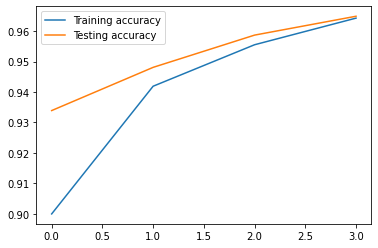

313/313 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9649
test loss:  0.12219122052192688
test accuracy:  0.964900016784668


In [ ]:
# build model and visualize the testing error
num_epochs=4
batch_size=32
seqModel =model.fit(X_train, y_train,
          batch_size      = batch_size,
          epochs          = num_epochs,
          validation_data = (X_test, y_test),
          shuffle         = True,
          verbose=0) #for visualization

# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_acc,label='Training accuracy')
plt.plot(xc, val_acc, label='Testing accuracy')
plt.legend()

plt.show()


loss, accuracy = model.evaluate(X_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

#### use for convinence of 1.7

In [ ]:
predictions = model.predict(X_test)
predict_class = np.argmax(predictions, axis = 1)

mis_classification_1 = original_X_test[predict_class!= original_y_test]

## 1.4 ReLU [5 points] 
This time, use the ReLU activation functions instead of the sigmoids. What
happens?

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


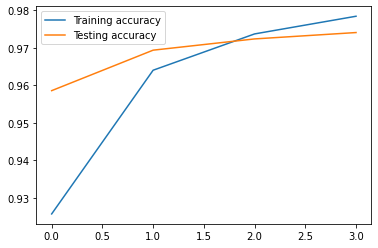

313/313 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9741
test loss:  0.09461081773042679
test accuracy:  0.9740999937057495


In [ ]:
model = Sequential([                  
  Dense(128, activation='relu', input_dim=784),
  Dense(10, activation='softmax'),
])

# model.add(keras.Input(shape=(28,)))
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


num_epochs=4
batch_size=32
seqModel =model.fit(X_train, y_train,
          batch_size      = batch_size,
          epochs          = num_epochs,
          validation_data = (X_test, y_test),
          shuffle         = True,
          verbose=0) #for visualization

# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_acc,label='Training accuracy')
plt.plot(xc, val_acc, label='Testing accuracy')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

The accuacy of use the sigmoids activation function seems performance better than ReLU activation function. 

#### some code for 1.7

In [ ]:
predictions = model.predict(X_test)
predict_class = np.argmax(predictions, axis = 1)
mis_classification_2 = original_X_test[predict_class!= original_y_test]

## 1.5 Dropout [5 points]
Now add two hidden layers. You should end up with a three-layer deep neural network. Use Keras to model the network and add dropout to each layer. Furthermore, use L2 regularization for the training objective. Use cross-validation to select the best
regularization and dropout hyperparameters. How much improvement did you get?

In [ ]:
dropout_rate_list = [0.2,0.3,0.4]
regularization_factor_list = [0.0001, 0.001, 0.01]

result = []


for dropout_rate in dropout_rate_list:
    for regularization_factor in regularization_factor_list:



        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=784))
        model.add(Dropout(dropout_rate))
        model.add(Dense(128, activation='relu', input_dim=784))
        model.add(Dropout(dropout_rate))
        model.add(Dense(128, activation='relu', input_dim=784))
        model.add(Dropout(dropout_rate))
        model.add(Dense(10, activation='softmax', kernel_regularizer=l2(regularization_factor)))
        rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer=rmsprop,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


        num_epochs=4
        batch_size=32
        seqModel =model.fit(X_train, y_train,
                  batch_size      = batch_size,
                  epochs          = num_epochs,
                  validation_data = (X_test, y_test),
                  shuffle         = True,
                  verbose=0) #for visualization

        loss, accuracy = model.evaluate(X_test, y_test)
        print('dropout value is', dropout_rate, ', and regularization factor l2 value is', regularization_factor)
        print('test loss: ', loss)
        print('test accuracy: ', accuracy)


        result.append([dropout_rate, regularization_factor, accuracy, loss])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


313/313 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9724
dropout value is 0.2 , and regularization factor l2 value is 0.0001
test loss:  0.12562254071235657
test accuracy:  0.9724000096321106
313/313 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.9746
dropout value is 0.2 , and regularization factor l2 value is 0.001
test loss:  0.11809258162975311
test accuracy:  0.9746000170707703
313/313 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9717
dropout value is 0.2 , and regularization factor l2 value is 0.01
test loss:  0.13082532584667206
test accuracy:  0.9717000126838684
313/313 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9703
dropout value is 0.3 , and regularization factor l2 value is 0.0001
test loss:  0.14082275331020355
test accuracy:  0.970300018787384
313/313 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.9703
dropout value is 0.



---
I found that the optimal hyperparameter have dropout value 0.2 , and regularization factor l2 value 0.001. 
\
test loss:  0.11809258162975311
\
test accuracy:  0.9746000170707703


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


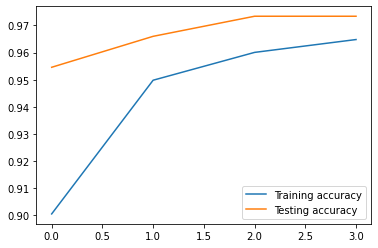

313/313 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9734
test loss:  0.11669627577066422
test accuracy:  0.9733999967575073


In [ ]:
dropout_rate = 0.2
regularization_factor = 0.001


model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dropout(dropout_rate))
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dropout(dropout_rate))
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(regularization_factor)))
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


num_epochs=4
batch_size=32
seqModel =model.fit(X_train, y_train,
          batch_size      = batch_size,
          epochs          = num_epochs,
          validation_data = (X_test, y_test),
          shuffle         = True,
          verbose=0) #for visualization



# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_acc,label='Training accuracy')
plt.plot(xc, val_acc, label='Testing accuracy')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)



---
Conclusion: 

It get tiny improvement. Dropout and L2 regularization are used to avoid overfitting. And the learning curve for training and testing are different than models in 1.3 and 1.4. Due to randomness of the Neural Network model, the above test accuracy for optimal model has little change than the accuracy I got when tune hyperparamter.  


#### use for 1.7 code

In [ ]:
predictions = model.predict(X_test)
predict_class = np.argmax(predictions, axis = 1)

mis_classification_3 = original_X_test[predict_class!= original_y_test]

## 1.6 Convolution [5 points]


Use Keras to model and train a simple convolutional network with
one convolutional layer, one pooling layer, and one fully connected layer. You are free to pick
any hyperparameters you want: play with the data and provide some justification behind your
hyperparameter selection. How much improvement did you get, if any?

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


X_train = np.reshape(np.array(X_train),(X_train.shape[0],28,28,1))
X_test = np.reshape(np.array(X_test),(X_test.shape[0],28,28,1))

model = keras.Sequential(
    [
  
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (28,28,1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ]
)

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


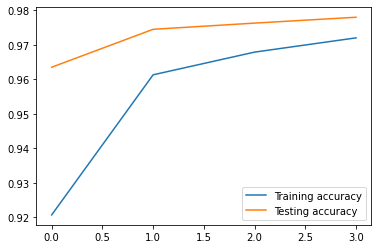

313/313 [==============================] - 2s 6ms/step - loss: 0.0727 - accuracy: 0.9780
test loss:  0.07274530827999115
test accuracy:  0.9779999852180481


In [ ]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


num_epochs=4
batch_size=32
seqModel =model.fit(X_train, y_train,
          batch_size      = batch_size,
          epochs          = num_epochs,
          validation_data = (X_test, y_test),
          shuffle         = True,
          verbose=0) #for visualization



# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_acc,label='Training accuracy')
plt.plot(xc, val_acc, label='Testing accuracy')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

I use dropout = 0.5, and RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0). This is the same as previous model's hyperparameter.  

The performance of CNN has little improvement from the optimal model in Q1.5. And it is the best among all models. 

### 1.7 Mugshots [5 points] 
Display nine images of your choice that were consistently misclassified
by all of the above models (if there are no such images, pick at least those that were misclassified most of the time). You can plot an image via matplotlib.pyplot.imshow(image,
cmap=’gray’). Would you be able to classify those images yourself or not? Why?

In [ ]:
# Get misclassification for CNN model 


(original_X_train, original_y_train), (original_X_test, original_y_test) = mnist.load_data()
predict_class!= original_y_test

X_train = np.reshape(np.array(X_train),(X_train.shape[0],28,28,1))
X_test = np.reshape(np.array(X_test),(X_test.shape[0],28,28,1))


predictions = model.predict(X_test)
predict_class = np.argmax(predictions, axis = 1)

mis_classification_4 = original_X_test[predict_class!= original_y_test]

In [ ]:
# get the common value for mis_classfication 1,2,3,4
common_mis = np.intersect1d(np.intersect1d(np.intersect1d(mis_classification_1, mis_classification_2), mis_classification_3), mis_classification_4)
common_mis

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
top_nine = original_X_test[:9]

9

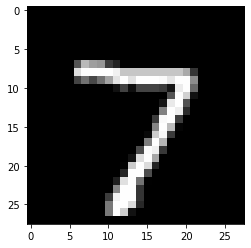

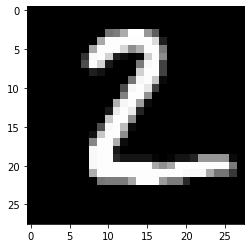

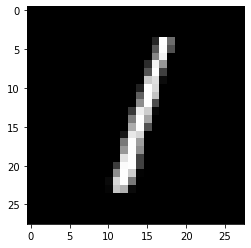

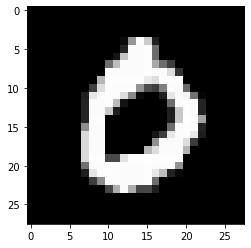

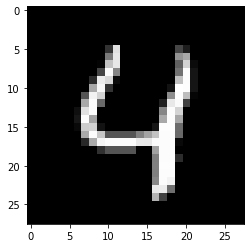

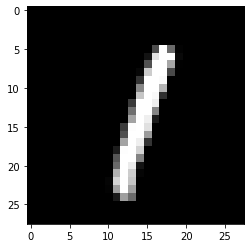

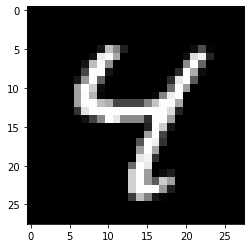

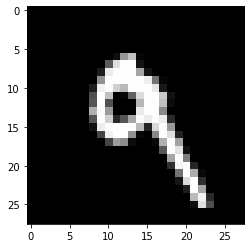

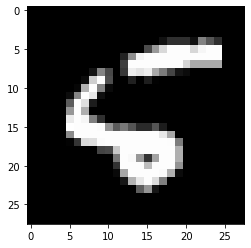

In [ ]:
import matplotlib
for i in top_nine:
    # matplotlib.pyplot.imshow(i,cmap='gray')
    a = np.reshape(i,(28,28))
    # img = Image.fromarray(np.uint8(a), 'L') # Creating image from a 2d array contained in list images
    matplotlib.pyplot.imshow(a,cmap='gray')
    matplotlib.pyplot.show()

##### conclusion: 

For the image looks like '1','2','7', I can classify myself. But for other images, it's blurred. I cannot distinguish exactly what digit the image shows. 

## Reference: 




1.   https://www.kaggle.com/bunnyistaken/cnn-model-99-accuracy-digit-recognizer
2.   https://keras.io/examples/vision/mnist_convnet/
3. https://keras.io/getting_started/intro_to_keras_for_engineers/
4. https://www.machinecurve.com/index.php/2020/02/21/how-to-predict-new-samples-with-your-keras-model/

